In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

1.7.0


The word tensor is actually a fancy word for an n-dimensional array.

In [7]:
hello = tf.constant("Hello")

In [8]:
world = tf.constant("World")

In [9]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [10]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [13]:
with tf.Session() as sess: # 'with' is actually used here so that we do not have to manually close the session
    result = sess.run(hello+world)

In [14]:
print(result)

b'HelloWorld'


In [15]:
a = tf.constant(10)

In [16]:
b = tf.constant(20)

In [17]:
type(a)

tensorflow.python.framework.ops.Tensor

In [18]:
a + b

<tf.Tensor 'add_3:0' shape=() dtype=int32>

In [20]:
a + b # note that tensorflow haven't actually executed these tasks as for that we need to run them inside a session

<tf.Tensor 'add_5:0' shape=() dtype=int32>

In [24]:
with tf.Session() as sess:
    result = sess.run(a + b)

In [25]:
print(result)

30


In [26]:
result

30

In [27]:
type(result)

numpy.int32

In [28]:
const = tf.constant(10)

In [29]:
fill_mat = tf.fill((4,4), 10)

In [30]:
myzeros = tf.zeros((4,4))

In [31]:
myones = tf.ones((4,4))

In [33]:
myrandn = tf.random_normal((4,4), mean=0, stddev=1.0)

In [34]:
myrandu = tf.random_uniform((4,4), minval=0, maxval=1)

In [35]:
myzeros

<tf.Tensor 'zeros:0' shape=(4, 4) dtype=float32>

In [36]:
my_ops = [const, fill_mat, myzeros, myones, myrandn, myrandu]

In [38]:
sess = tf.InteractiveSession() # generally in the documentation of tensorflow and even in general the general way of running
# sessions is using `with tf.Session() as session`, however in notebook environments an interactive session if initialized 
# makes sure that the session is always present

In [40]:
for op in my_ops:
    print(sess.run(op))
    print("\n")

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.89689827  1.6769004  -0.85937595  0.49958047]
 [-0.6105459   0.98743856  0.89970547  1.2814206 ]
 [-0.2890664   2.5945678   1.5336723   2.6396132 ]
 [-0.07835943 -0.22255285 -1.3304615  -0.00394541]]


[[0.6439192  0.34267926 0.32181025 0.4389912 ]
 [0.274552   0.9866229  0.9971632  0.39009166]
 [0.01242507 0.827567   0.7600205  0.05278635]
 [0.62347376 0.46663225 0.5492747  0.3145857 ]]




Also in some cases with an operation the `eval` method is used in order to evaluate the operation. 

In [41]:
a = tf.constant([[1,2], 
                 [3,4]])

In [42]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [43]:
b = tf.constant([[10],[100]])

In [44]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [45]:
result = tf.matmul(a,b)

In [47]:
sess.run(result) # note that only inside the session will the thing actually execute

array([[210],
       [430]])

In [48]:
result.eval()

array([[210],
       [430]])

# Tensorflow graphs

In [49]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2

In [50]:
with tf.Session() as sess:
    result = sess.run(n3)

In [51]:
print(result)

3


In [56]:
print(tf.get_default_graph())

In [53]:
 # when tensorflow starts it creates a default graph for us

In [54]:
g = tf.Graph()

In [55]:
print(g)

In [57]:
graph_one = tf.get_default_graph()

In [58]:
graph_two = tf.Graph()

In [59]:
print(graph_two)

In [60]:
with graph_two.as_default(): # basically making graph_two as the default graph
    print(graph_two is tf.get_default_graph())

True


There are really two main types of objects in a tensorflow graph: variables and placeholders

# Variables and Placeholders

In [61]:
sess = tf.InteractiveSession()

In [62]:
my_tensor = tf.random_uniform((4,4), 0,1)

In [63]:
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [64]:
my_var = tf.Variable(initial_value=my_tensor)

In [65]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [66]:
init = tf.global_variables_initializer() # variables need to be initialized first. 

In [69]:
sess.run(init) # we need to definitely run this command first in order to use the variables

In [72]:
sess.run(my_var)

array([[0.620734  , 0.5565381 , 0.7196424 , 0.9699681 ],
       [0.30096877, 0.27587354, 0.66073346, 0.63314974],
       [0.5363928 , 0.2098788 , 0.87672174, 0.8316977 ],
       [0.7667037 , 0.2907189 , 0.5588242 , 0.52495193]], dtype=float32)

In [73]:
#recall that these are essentially the weights in our graphs

In [76]:
ph = tf.placeholder(tf.float32) # the datatype of the placeholder has to be defined. There is an optional shape argument
# that may be defined depending on the training data that we are going to have
# it is also common practice to keep the shape as (None, 5) where None can be then filled up with the actual number of samples

# Neural Network using Tensorflow

Lets say we are building a graph for the following expression: `wx + b = z`
The graph is going to look something like the following:

```
w(variable)-----> tf.matmul()(operation)----->tf.add()(operation)----->activation_function
                      |                          |
                      |                          |
x(placeholder)--------|           b(variable)----|
```

In [77]:
import numpy as np

In [78]:
np.random.seed(101)
tf.set_random_seed(101)

In [79]:
rand_a = np.random.uniform(0,100,(5,5))

In [80]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [81]:
rand_b = np.random.uniform(0,100,(5,1))

In [82]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [83]:
a = tf.placeholder(tf.float32)

In [84]:
b = tf.placeholder(tf.float32)

In [85]:
add_op = a + b

In [86]:
mul_op = a * b

In [87]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:10, b:20})
    print(add_result)

30.0


In [88]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [89]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mult_result  =sess.run(mul_op, feed_dict={a:rand_a, b:rand_b}) # note that these are placeholder objects and hence they 
    # need a feed dictionary
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [90]:
n_features = 10
n_dense_neurons = 3 # essentially the number of neurons, essentially one hidden layer

In [92]:
x = tf.placeholder(tf.float32, (None, 10))

In [93]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [94]:
xW = tf.matmul(x,W) # creating operations

In [95]:
z = tf.add(xW, b)# creating operations

In [96]:
a = tf.sigmoid(z)

In [97]:
init = tf.global_variables_initializer()

In [99]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [101]:
print(layer_out) # again note here that we are not actually doing any back propagation, we are simpy doing forward propagation

[[0.52746016 0.4120276  0.89018965]]


# Simple Regression Example

In [103]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [104]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

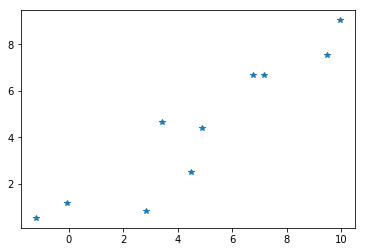

In [109]:
plt.plot(x_data, y_label, '*')

In [110]:
# Now note that this is a regression example and what we are going to do is to train a neural network for this kind of data

y = mx + b

In [119]:
m = tf.Variable(np.random.rand(1)) # m is here the weight that is going to be adjusted
b = tf.Variable(np.random.rand(1)) # b is the biased value

In [133]:
error = 0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [122]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [123]:
init = tf.global_variables_initializer()

In [131]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

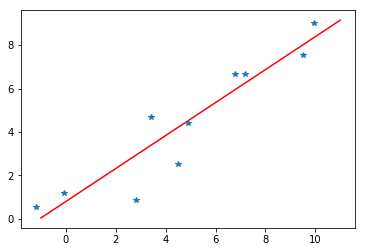

In [132]:
x_test = np.linspace(-1,11,10) 
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')